# Airline Passenger Satisfaction
### What factors lead to customer satisfaction for an Airline?

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

#### About Dataset:
Context:

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# sns.set()

pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read Data

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Remove ID Column

In [4]:
data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
test_data.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [5]:
data.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [6]:
print(data.shape)
print(test_data.shape)
print(f"Number of rows in training data: {data.shape[0]}")
print(f"Number of rows in test data: {test_data.shape[0]}")

(103904, 23)
(25976, 23)
Number of rows in training data: 103904
Number of rows in test data: 25976


In [7]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- Average departure delay: `14 Minutes` <br>
- Average arrival delay: `15 Minutes`
- Inflight wifi service has the lowest rating out of 5 (2.72)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
#data.columns

In [10]:
# convert categorical columns to type object
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

data[cat_cols_temp] = data[cat_cols_temp].astype(object)
test_data[cat_cols_temp] = test_data[cat_cols_temp].astype(object)

## EDA (exploratory data analysis)

([<matplotlib.patches.Wedge at 0x111dcf83a30>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

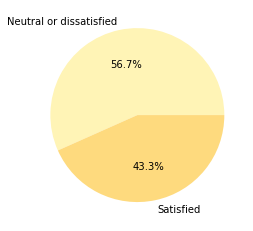

In [11]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')

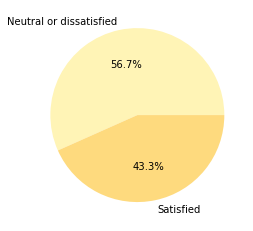

In [12]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"],
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

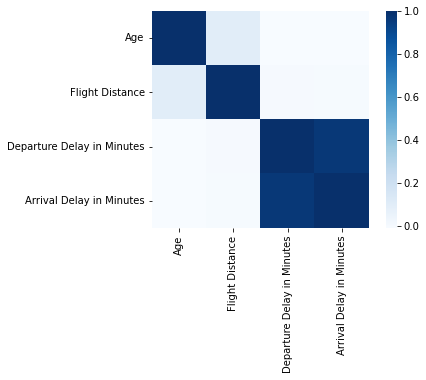

In [13]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

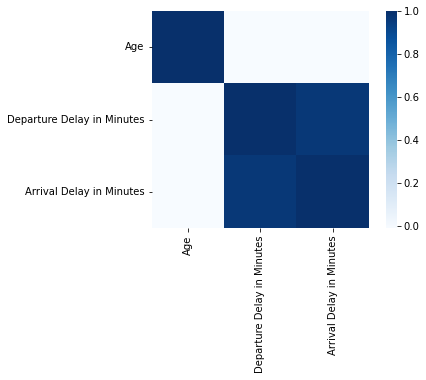

In [14]:
# see only these 3 columns
corr_mat = data.corr().loc[['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
                           ['Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

### Univariate Analysis

In [15]:
# Show categorical and numerical columns
cat_columns = data.select_dtypes(object).columns.to_list()
print("Categorical coulumns are: " , cat_columns)
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print("Numerical columns are: " , num_columns)

Categorical coulumns are:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

Numerical columns are:  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


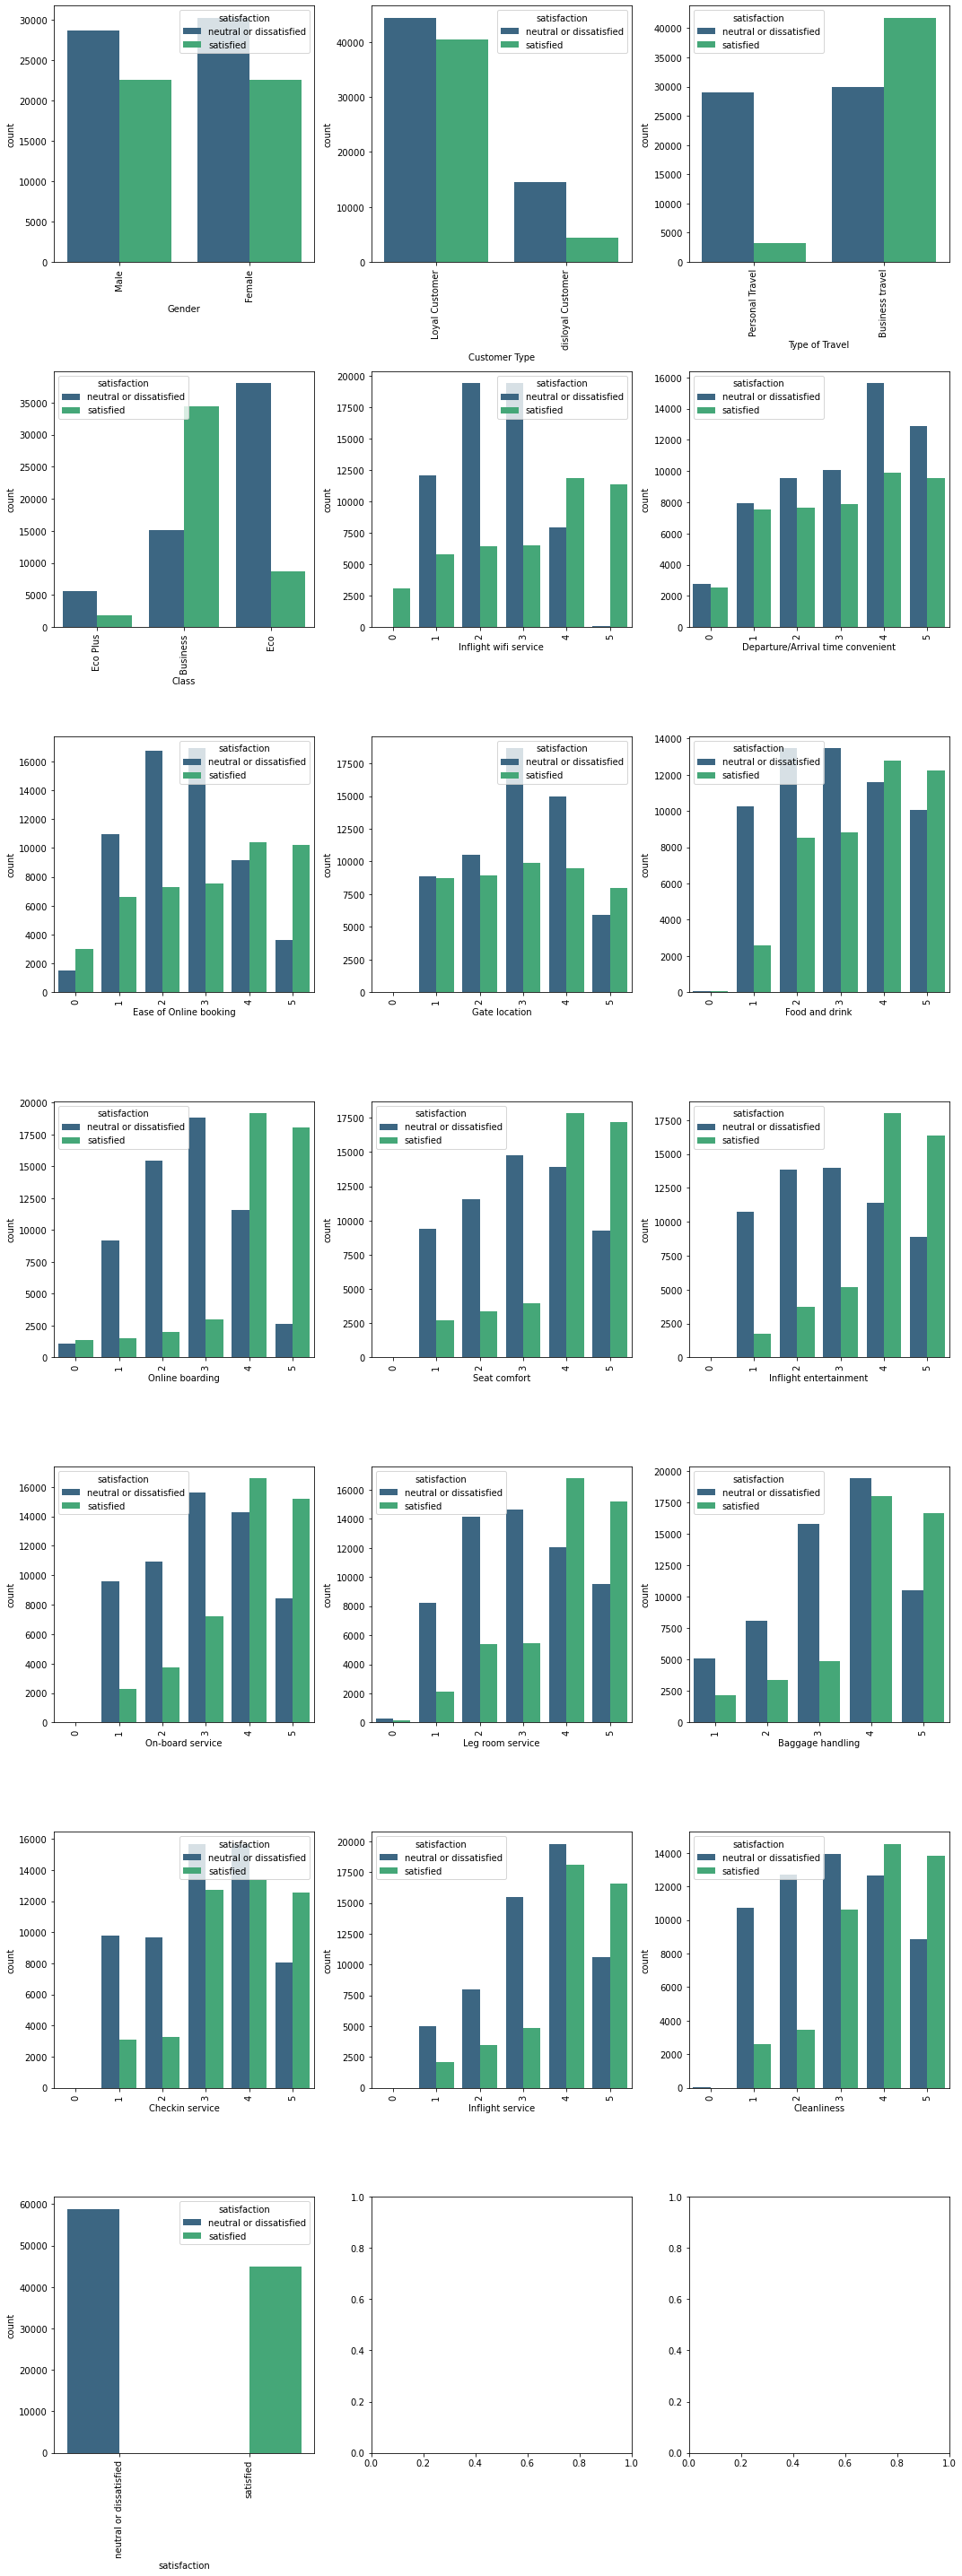

In [16]:
## Categorical Data

# create figure with subplots
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(15, 40))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_columns):
    sns.countplot(x=var, hue='satisfaction', data=data,  palette= 'viridis', ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

- Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
- Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

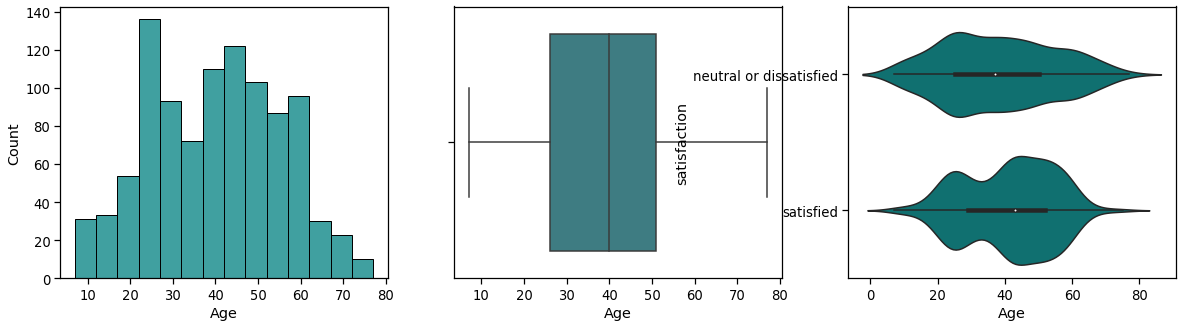

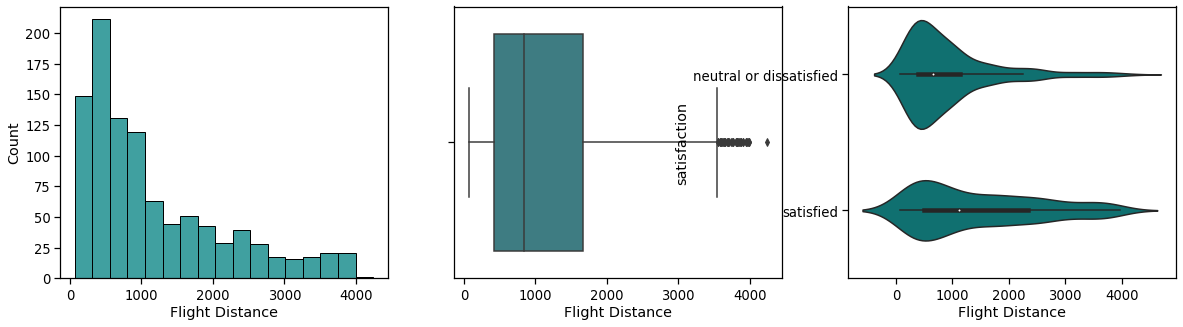

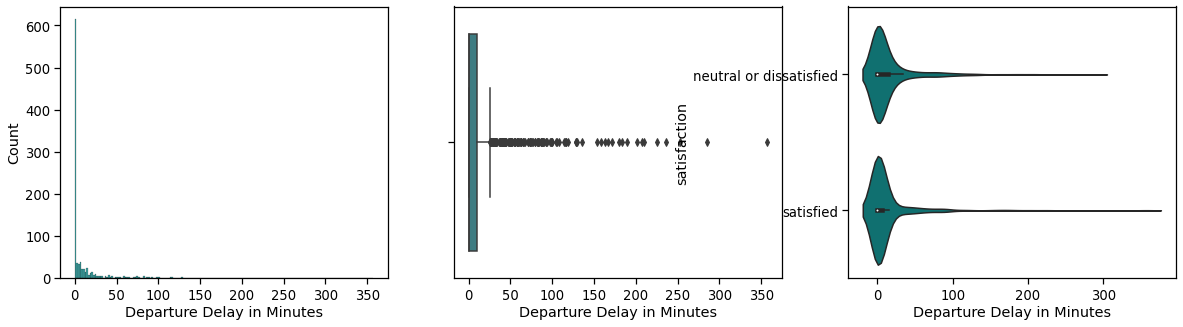

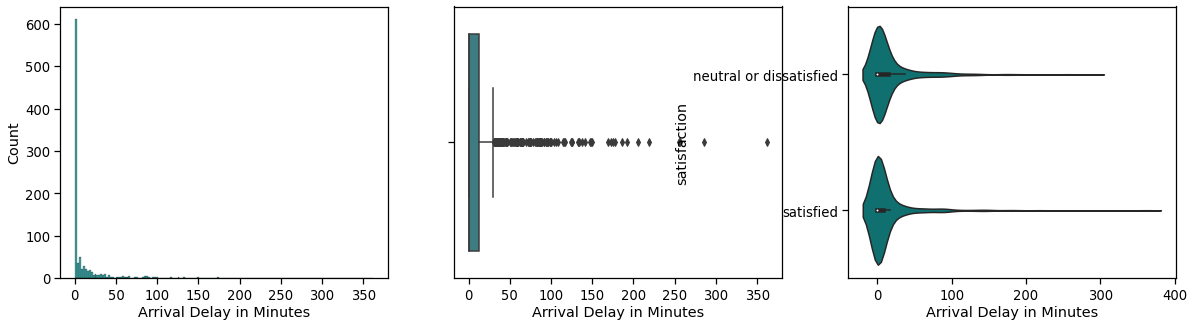

In [17]:
## Numerical Data

sample_data = data.sample(1000)
sns.set_context('notebook', font_scale= 1.2)
for col in (num_columns):
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    sns.histplot(sample_data[col], ax = ax[0], color= 'teal')
    sns.boxplot(sample_data[col], ax= ax[1], palette= 'crest')
    sns.violinplot(sample_data[col],  y=data['satisfaction'], ax = ax[2], color= 'teal')

- Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.
- Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

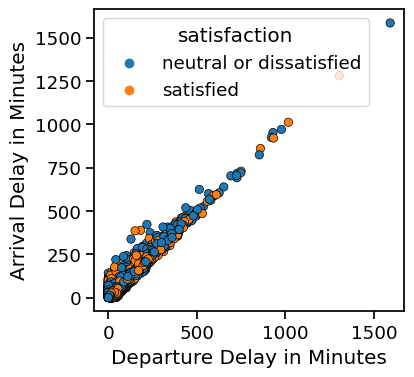

In [18]:
plt.figure(figsize=(4,4),dpi=100)
sns.scatterplot(x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction", data=data, edgecolor="black")
plt.show()

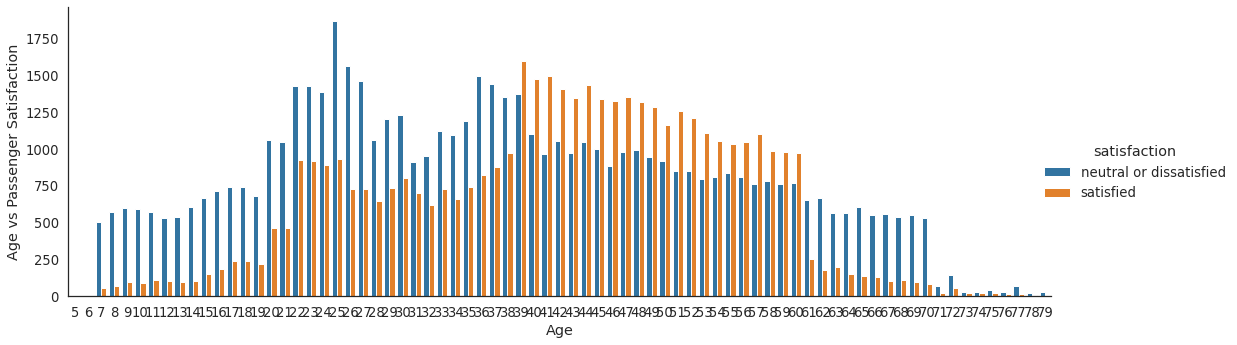

In [19]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=data, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

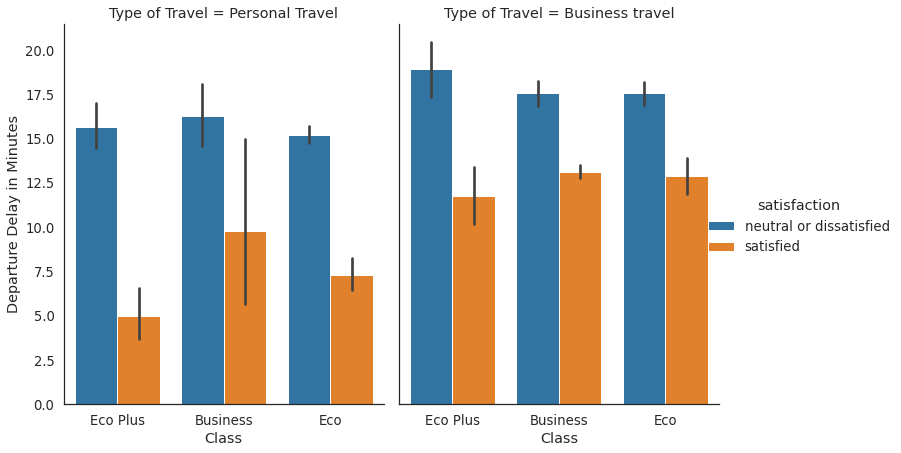

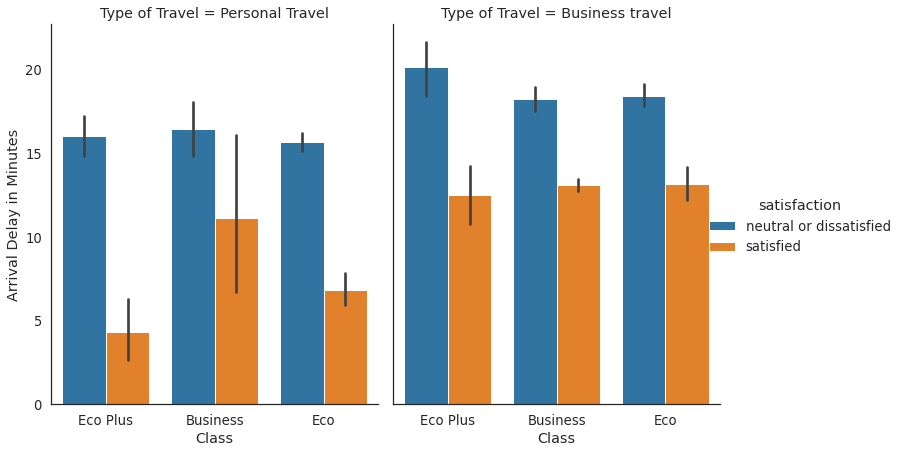

In [20]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=6.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=6.5, aspect=.8)

### Bivariate Analysis

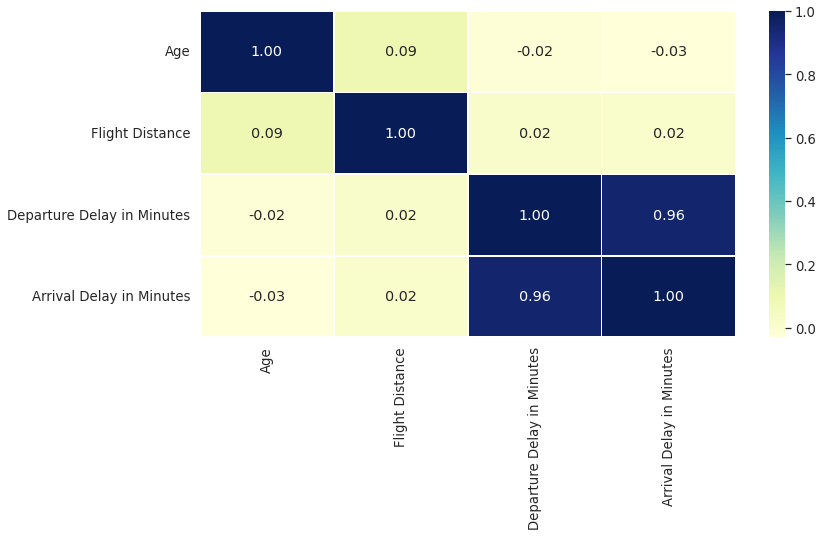

In [21]:
with sns.axes_style('white'):
    plt.figure(figsize= (12, 6))
    sns.heatmap(sample_data.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

- Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

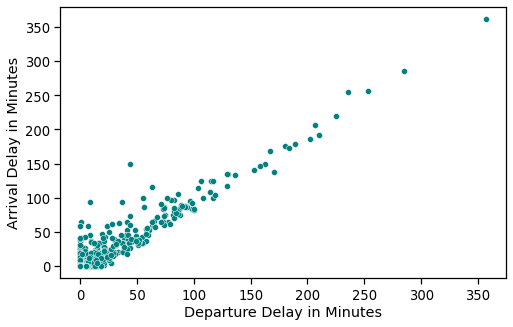

In [22]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = sample_data, color = 'teal')
plt.show()

In [23]:
# Drop Departure Delay in Minutes , highly correlated with Arrival Delay
data.drop('Departure Delay in Minutes', axis=1, inplace= True)
test_data.drop('Departure Delay in Minutes', axis=1, inplace= True)

### Data Cleaning

In [24]:
# Check null value
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [25]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Arrival Delay in Minutes    0.298352
dtype: float64

In [26]:
median_val = data['Arrival Delay in Minutes'].median()
# Filling missing values with median as distribution of arrival delay was heavily skewed
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(median_val)
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(median_val)

In [27]:
data[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
satisfaction                         2
dtype: int64

In [28]:
data['Inflight wifi service'].unique()

array([3, 2, 4, 1, 5, 0], dtype=object)

In [29]:
data['Leg room service'].unique()

array([3, 5, 4, 2, 1, 0], dtype=object)

- Satisfaction survey should be from 1 to 5 ,so the 6th category (0) is a missing value
- Some of the missing values in categorical columns are represented by 0, lets replace them with mode of that particular column

In [30]:
## Let's first check the type of our columns
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

In [31]:
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                        'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
# modes = data[columns_containing_0].mode()
# data[columns_containing_0].replace({'0': modes} , inplace=True)
# test_data[columns_containing_0] = test_data[columns_containing_0].replace({'0': modes} , inplace=True)

In [32]:
for column in columns_containing_0:
    mode = data[column].mode()[0]
    data[column].replace(to_replace=0, value=mode , inplace=True)
    test_data[column].replace(to_replace=0, value=mode , inplace=True)

In [33]:
# Make sure that now they are only 5 unique values
data[cat_columns].nunique()

Gender                               2
Customer Type                        2
Type of Travel                       2
Class                                3
Inflight wifi service                5
Departure/Arrival time convenient    5
Ease of Online booking               5
Gate location                        5
Food and drink                       5
Online boarding                      5
Seat comfort                         5
Inflight entertainment               5
On-board service                     5
Leg room service                     5
Baggage handling                     5
Checkin service                      5
Inflight service                     5
Cleanliness                          5
satisfaction                         2
dtype: int64

In [34]:
## Check the type of our columns again
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                      object
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

In [35]:
## OOops 

# looks like the column we remove 0 from it becomes int type instead of object
# let's again convert categorical columns to type object
cat_cols_temp = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
                 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 
                 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

data[cat_cols_temp] = data[cat_cols_temp].astype(object)
test_data[cat_cols_temp] = test_data[cat_cols_temp].astype(object)

In [36]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

#### Show Unique Values of each Columns

In [37]:
# Loop over each column in the train DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:    
    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
Inflight wifi service: [3 2 4 1 5]
Departure/Arrival time convenient: [4 2 5 3 1]
Ease of Online booking: [3 2 5 4 1]
Gate location: [1 3 2 5 4]
Food and drink: [5 1 2 4 3]
Online boarding: [3 5 2 1 4]
Seat comfort: [5 1 2 3 4]
Inflight entertainment: [5 1 2 3 4]
On-board service: [4 1 2 3 5]
Leg room service: [3 5 4 2 1]
Baggage handling: [4 3 5 1 2]
Checkin service: [4 1 3 5 2]
Inflight service: [5 4 3 1 2]
Cleanliness: [5 1 2 3 4]
satisfaction: ['neutral or dissatisfied' 'satisfied']


In [38]:
# Loop over each column in the test DataFrame where dtype is 'object'
for col in test_data.select_dtypes(include=['object']).columns:    
    # Print the column name and the unique values
    print(f"{col}: {test_data[col].unique()}")

Gender: ['Female' 'Male']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Business travel' 'Personal Travel']
Class: ['Eco' 'Business' 'Eco Plus']
Inflight wifi service: [5 1 2 3 4]
Departure/Arrival time convenient: [4 1 3 5 2]
Ease of Online booking: [3 2 4 5 1]
Gate location: [4 1 2 3 5]
Food and drink: [3 5 2 4 1]
Online boarding: [4 2 1 5 3]
Seat comfort: [3 5 2 4 1]
Inflight entertainment: [5 4 2 1 3]
On-board service: [5 4 1 2 3]
Leg room service: [5 4 1 2 3]
Baggage handling: [5 4 3 1 2]
Checkin service: [2 3 4 1 5]
Inflight service: [5 4 2 1 3]
Cleanliness: [5 2 4 3 1]
satisfaction: ['satisfied' 'neutral or dissatisfied']


# Label Encoding for Categorial Columns

In [39]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                 object
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

In [40]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column (train and test) using the encoder
    data[col] = label_encoder.transform(data[col])
    test_data[col] = label_encoder.transform(test_data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")
    print(f"{col}: {test_data[col].unique()}")

Gender: [1 0]
Gender: [0 1]
Customer Type: [0 1]
Customer Type: [0 1]
Type of Travel: [1 0]
Type of Travel: [0 1]
Class: [2 0 1]
Class: [1 0 2]
Inflight wifi service: [2 1 3 0 4]
Inflight wifi service: [4 0 1 2 3]
Departure/Arrival time convenient: [3 1 4 2 0]
Departure/Arrival time convenient: [3 0 2 4 1]
Ease of Online booking: [2 1 4 3 0]
Ease of Online booking: [2 1 3 4 0]
Gate location: [0 2 1 4 3]
Gate location: [3 0 1 2 4]
Food and drink: [4 0 1 3 2]
Food and drink: [2 4 1 3 0]
Online boarding: [2 4 1 0 3]
Online boarding: [3 1 0 4 2]
Seat comfort: [4 0 1 2 3]
Seat comfort: [2 4 1 3 0]
Inflight entertainment: [4 0 1 2 3]
Inflight entertainment: [4 3 1 0 2]
On-board service: [3 0 1 2 4]
On-board service: [4 3 0 1 2]
Leg room service: [2 4 3 1 0]
Leg room service: [4 3 0 1 2]
Baggage handling: [3 2 4 0 1]
Baggage handling: [4 3 2 0 1]
Checkin service: [3 0 2 4 1]
Checkin service: [1 2 3 0 4]
Inflight service: [4 3 2 0 1]
Inflight service: [4 3 1 0 2]
Cleanliness: [4 0 1 2 3]
Clean

In [42]:
# After encoding the caategorical features it will be of type int
data.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                        int64
Inflight wifi service                  int32
Departure/Arrival time convenient      int32
Ease of Online booking                 int32
Gate location                          int32
Food and drink                         int32
Online boarding                        int32
Seat comfort                           int32
Inflight entertainment                 int32
On-board service                       int32
Leg room service                       int32
Baggage handling                       int32
Checkin service                        int32
Inflight service                       int32
Cleanliness                            int32
Arrival Delay in Minutes             float64
satisfaction                           int32
dtype: obj

In [43]:
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,2,3,2,0,4,2,4,4,3,2,3,3,4,4,18.0,0


### Check class value

0    58879
1    45025
Name: satisfaction, dtype: int64

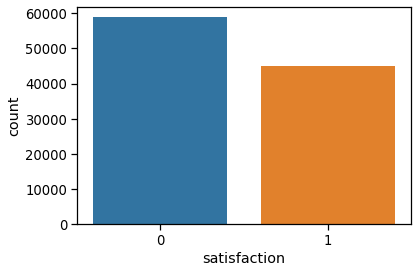

In [44]:
sns.countplot(data['satisfaction'])
data['satisfaction'].value_counts()

# Upsampling

Our data is imbalanced so we try to balance it

In [45]:
np.random.seed(42)
#create two different dataframe of majority and minority class 
df_majority = data[(data['satisfaction']==0)] 
df_minority = data[(data['satisfaction']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 58879, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([df_minority_upsampled, df_majority])

1    58879
0    58879
Name: satisfaction, dtype: int64

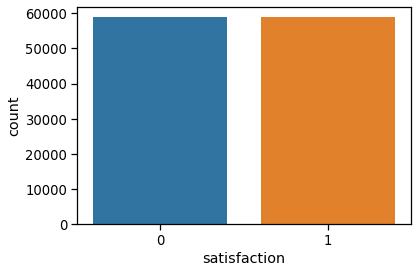

In [46]:
sns.countplot(data_upsampled['satisfaction'])
data_upsampled['satisfaction'].value_counts()

### Remove Outlier using IQR

In [47]:
data_upsampled.shape

(117758, 22)

In [48]:
# specify the columns to remove outliers from dataframe (Numerical columns)
column_names = ['Age', 'Flight Distance', 'Arrival Delay in Minutes']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = data_upsampled[column_name].quantile(0.25)
    Q3 = data_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data_upsampled = data_upsampled[~((data_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (data_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

data_upsampled.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
6287,0,0,43,0,0,3603,2,2,2,2,1,1,1,4,4,4,4,3,4,1,0.0,1
100566,1,0,45,0,1,451,3,1,1,1,3,3,3,3,4,4,0,4,0,3,0.0,1


In [49]:
data_upsampled.shape

(100823, 22)

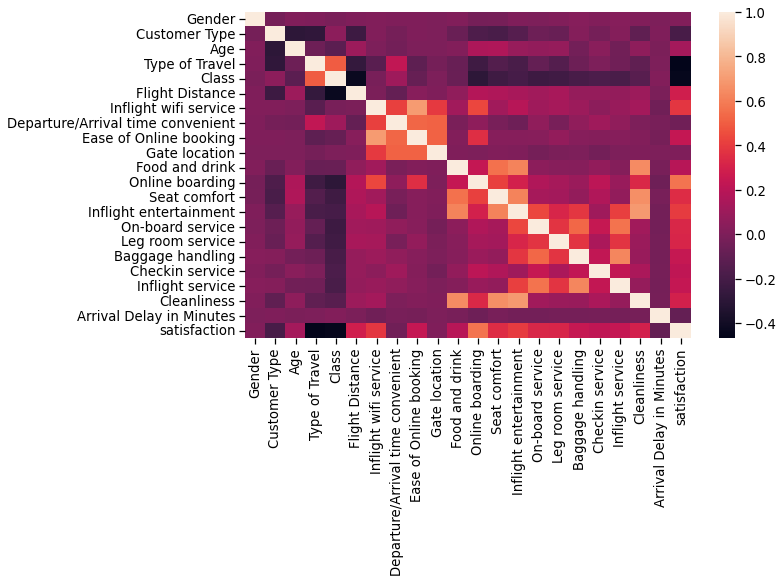

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(data_upsampled.corr(), fmt='.2g')

1    51493
0    49330
Name: satisfaction, dtype: int64

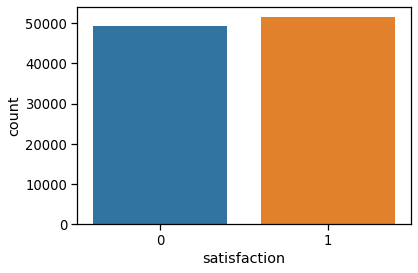

In [51]:
sns.countplot(data_upsampled['satisfaction'])
data_upsampled['satisfaction'].value_counts()

We can add a new column to train and test DataFrames called adult from age column to be 0 or 1

In [ ]:
# data['Adult'] = data['Age']
# data.loc[list(data[data['Age'] < 18].index), ['Adult']] = 0
# data.loc[list(data[data['Age'] >= 18].index), ['Adult']] = 1

In [60]:
print(data_upsampled.shape)
print(test_data.shape)

(100823, 22)
(25976, 22)


In [61]:
data_upsampled.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
6287,0,0,43,0,0,3603,2,2,2,2,1,1,1,4,4,4,4,3,4,1,0.0,1


In [62]:
test_data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,4,3,2,3,2,3,2,4,4,4,4,1,4,4,44.0,1


#### Save processed train and test files

In [63]:
data_upsampled.to_csv('processed_train.csv',index=False)

In [64]:
test_data.to_csv('processed_test.csv',index=False)

Input : train.csv and test.csv

Output: processed_train.csv and processed_test.csv